In [ ]:
%load_ext autoreload
%autoreload 2

In [29]:
from after.dataset import SimpleDataset

dataset_path = ""
dataset = SimpleDataset(path = "/Users/demerle/Documents/PHD/repos/midi_generation/output/dataset4/process_aug_descr", keys = "all")

print("Dataset Length: ", len(dataset)) 
print("Dataset Keys: ", dataset.buffer_keys)

Dataset Length:  48
Dataset Keys:  ['augment_shift_stretch_0', 'beat_clock', 'bandwidth', 'flatness', 'z', 'metadata', 'augment_shift_stretch_3', 'rolloff', 'centroid', 'augment_shift_stretch_1', 'downbeat_clock', 'augment_shift_stretch_2']


augment_shift_stretch_0


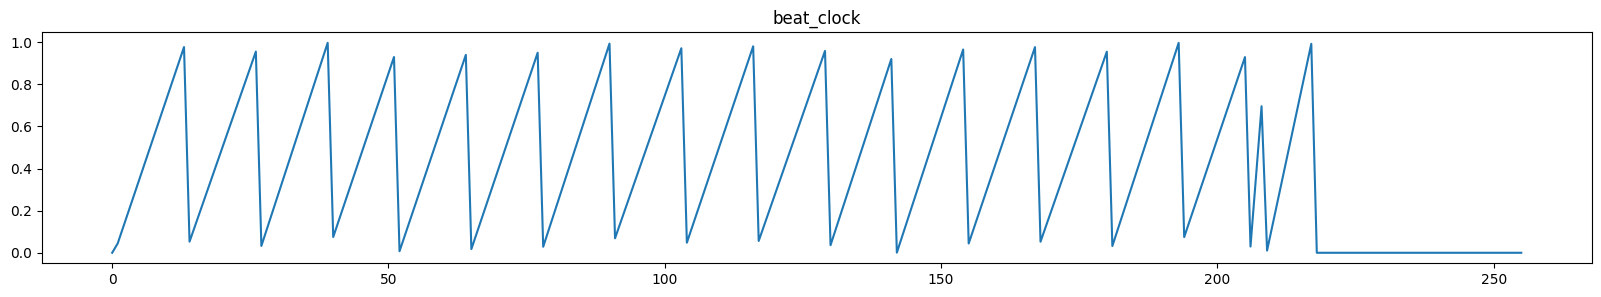

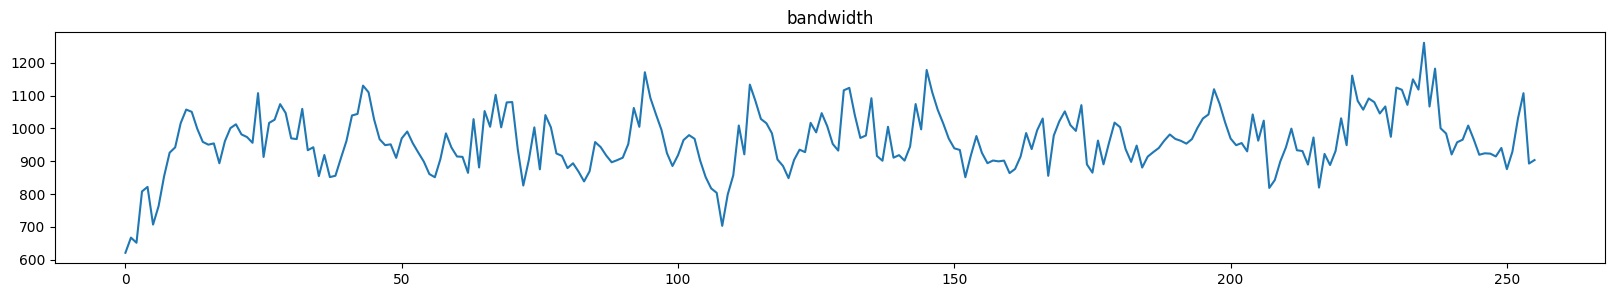

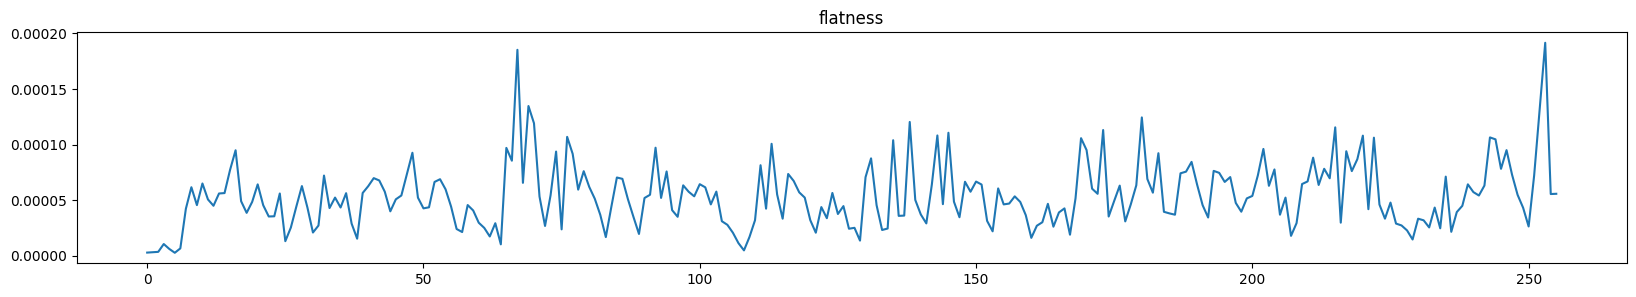

z


metadata {'path': '/Users/demerle/Documents/PHD/repos/midi_generation/output/dataset4/audio/midi100_052_Choir_ahs.wav', 'chunk_index': 0}
augment_shift_stretch_3


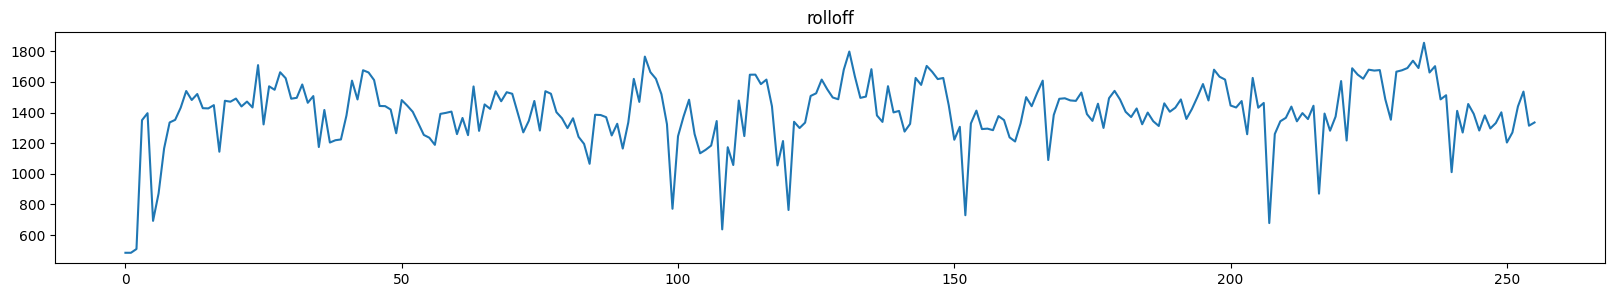

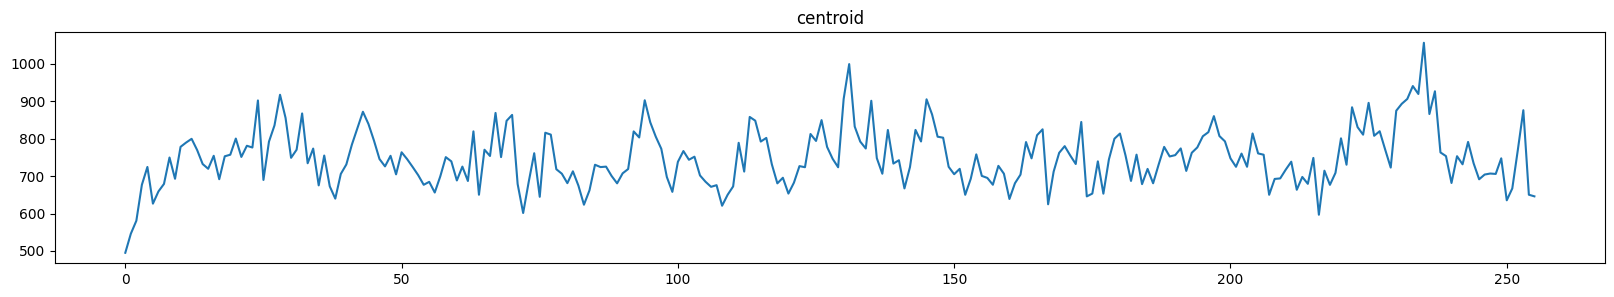

augment_shift_stretch_1


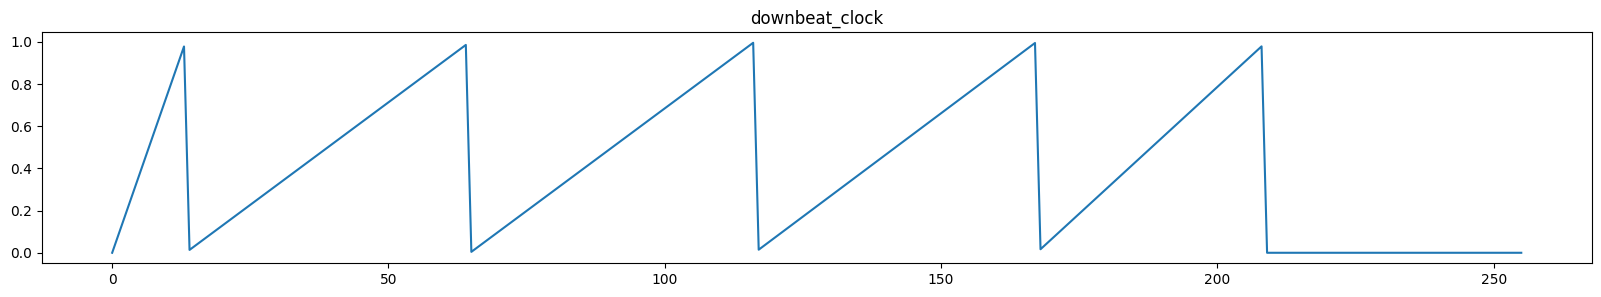

augment_shift_stretch_2


In [ ]:
import torch
import matplotlib.pyplot as plt
from IPython.display import Audio
emb_model_path = "/Users/demerle/Documents/PHD/repos/AFTER/pretrained/test.ts"
emb_model = torch.jit.load(emb_model_path)

idx = 0
data = dataset[idx]
for key in dataset.buffer_keys:
    if key == "metadata":
        print(key, data[key])
    elif "z" in key or "augment" in key:
        z = data[key]
        z = torch.from_numpy(z).float().reshape(1, z.shape[-2], z.shape[-1])#.unsqueeze(0)
        with torch.no_grad():
            audio = emb_model.decode(z)
        print(key)
        display(Audio(audio.squeeze().numpy(), rate=44100))
    else:
        plt.figure(figsize = (20, 3))
        plt.title(key)
        plt.plot(data[key])
        plt.show()
        

        